### Crop object using mask image
마스크 이미지를 이용해 오브젝트만 추출하기 / 배경 제거하기

Image bit operation / 이미지 연산

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load an image

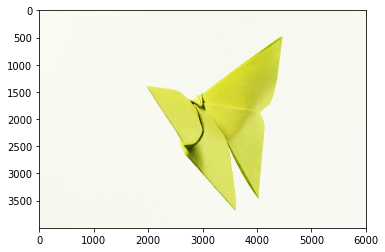

In [86]:
path = 'img/butterfly.jpeg'
src = cv2.imread(path) # grayscale
plt.imshow(src)

Create a mask image

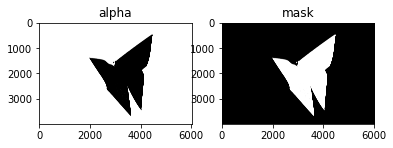

In [87]:
# threshold
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
h, w = gray.shape

# mask
_, alpha = cv2.threshold(gray, 127, 255, cv2.THRESH_OTSU)
mask = 255 - alpha # inverse_mask

# morph closing
# k = np.ones((3, 3), np.uint8)
# masked = cv2.morphologyEx(masked, cv2.MORPH_CLOSE, k)

plt.subplot(1, 2, 1)
plt.title('alpha')
plt.imshow(alpha, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('mask')
plt.imshow(mask, cmap='gray')

Apply mask to image

원본 이미지에서 오브젝트만 추출하기

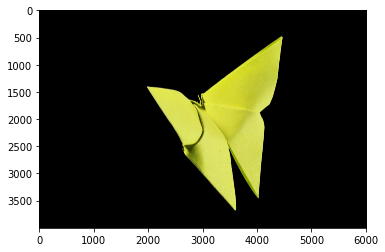

In [88]:
# bitwise and
obj = cv2.bitwise_and(src, src, mask=mask)
plt.imshow(obj)

Add alpha channel

알파 채널을 추가해서 투명하게 저장

In [96]:
# make background
bg = np.zeros((h, w, 3), np.uint8)

# concatenate
# dstack((a,b)) == stack((a,b), axis=-1)
# [b, g, r, alpha]
# print(output.shape) (4000, 6016, 4)
output = np.dstack((obj, mask))

# save file
cv2.imwrite('img/butterfly_obj.png', output)

True